<a href="https://colab.research.google.com/github/KrishBajaj-DS/Flight_Fare_prediction/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Read the dataset
df = pd.read_csv("Customer_Segmentation.csv")

In [5]:
print("Shape of the dataset:", df.shape)


Shape of the dataset: (2240, 22)


In [6]:
print("Columns in the dataset:\n", df.columns.tolist())


Columns in the dataset:
 ['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain']


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
print(df.describe())


                 Id   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [9]:
print(df.head())


      Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0   6/16/2014        0       189  ...              111               189   
1   6/15/2014        0       464  ...                7                 0   
2   5/13/2014        0       134  ...               15                 2   
3    ########        0        10  ...                0                 0   
4    ########        0         6  ...               11                 0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurch

In [10]:
print("Null values in each column:\n", df.isnull().sum())


Null values in each column:
 Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


In [11]:
# Define purchase columns
purchase_columns = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]

# Define columns to drop
cols_to_drop = [col for col in ['Id'] + purchase_columns if col in df.columns]

# Create a cleaned copy
df_cleaned = df.copy()

# Calculate total purchase
df_cleaned['Total_Purchase'] = df_cleaned[purchase_columns].sum(axis=1)

# Drop unnecessary columns
df_cleaned.drop(columns=cols_to_drop, inplace=True)

# Display
df_cleaned.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Purchase
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,1,4,4,6,1,1,0,1190
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,1,7,3,7,5,1,0,577
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,1,3,2,5,2,0,0,251
3,1967,Graduation,Together,32474.0,1,1,########,0,1,1,0,2,7,0,0,11
4,1989,Graduation,Single,21474.0,1,0,########,0,2,3,1,2,7,1,0,91


In [12]:
print(df_cleaned.describe())


        Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000   
mean   1968.805804   52247.251354     0.444196     0.506250    49.109375   
std      11.984069   25173.076661     0.538398     0.544538    28.962453   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2240.000000      2240.000000          2240.000000   
mean            2.325000         4.084821             2.662054   
std             1.932238         2.778714             2.923101   
min             0.000000         0.000000          

In [13]:
df_cleaned.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Purchase
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,1,4,4,6,1,1,0,1190
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,1,7,3,7,5,1,0,577
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,1,3,2,5,2,0,0,251
3,1967,Graduation,Together,32474.0,1,1,########,0,1,1,0,2,7,0,0,11
4,1989,Graduation,Single,21474.0,1,0,########,0,2,3,1,2,7,1,0,91


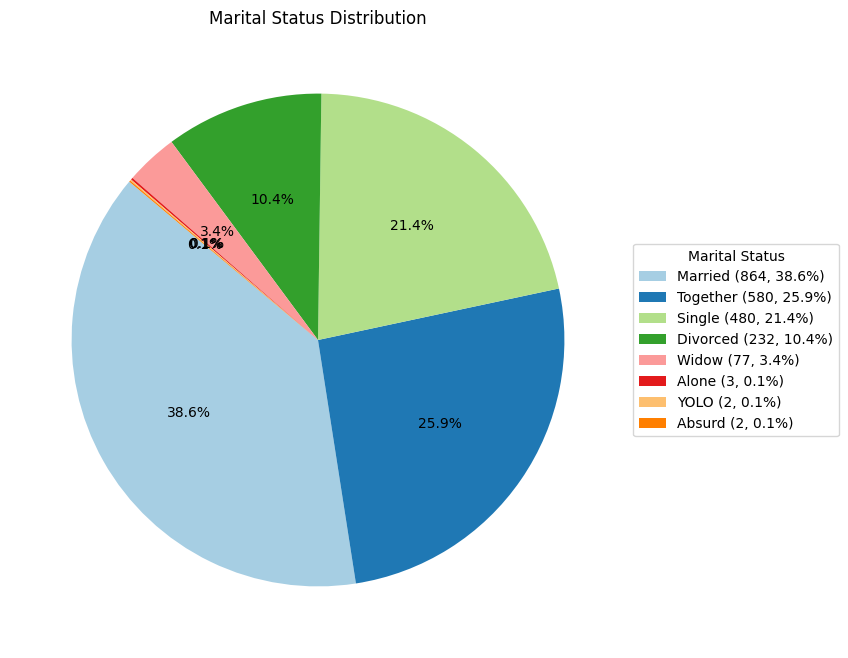

In [14]:
import matplotlib.pyplot as plt

# Count occurrences of each marital status
marital_counts = df_cleaned['Marital_Status'].value_counts()

# Create labels with exact count and percentage
labels = [f"{status} ({count}, {count/sum(marital_counts)*100:.1f}%)" for status, count in zip(marital_counts.index, marital_counts.values)]

# Plot pie chart
plt.figure(figsize=(8, 8))
wedges, _, autotexts = plt.pie(
    marital_counts, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors
)

# Add a legend with exact count and percentage
plt.legend(wedges, labels, title="Marital Status", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Marital Status Distribution')
plt.show()


<ipython-input-15-be88327e13cd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_counts.index, y=education_counts.values, palette="viridis")


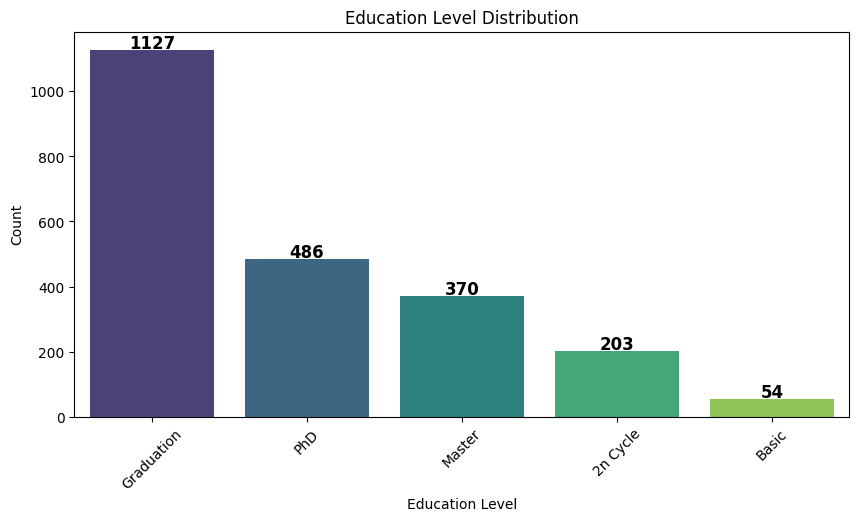

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each education level
education_counts = df_cleaned['Education'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=education_counts.index, y=education_counts.values, palette="viridis")

# Add exact count values on top of bars
for i, count in enumerate(education_counts.values):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12, fontweight='bold')

plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Education Level Distribution")
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.show()




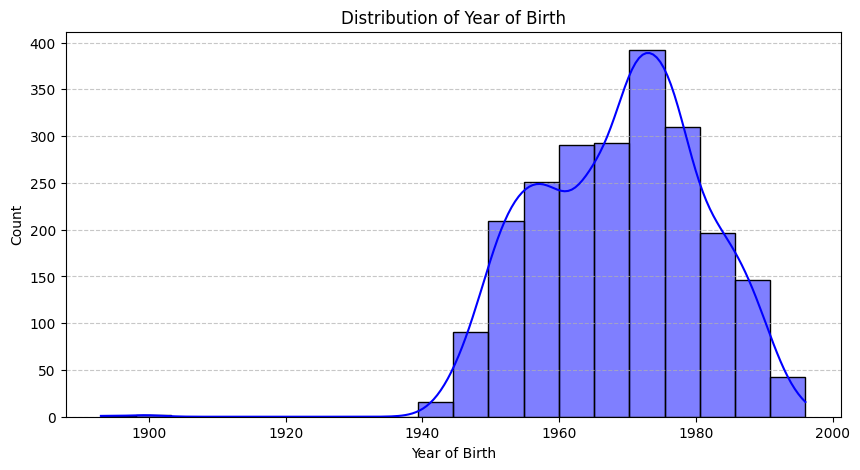

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Plot histogram
sns.histplot(df_cleaned['Year_Birth'], bins=20, kde=True, color="blue")

# Labels and title
plt.xlabel("Year of Birth")
plt.ylabel("Count")
plt.title("Distribution of Year of Birth")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add grid for better readability

plt.show()


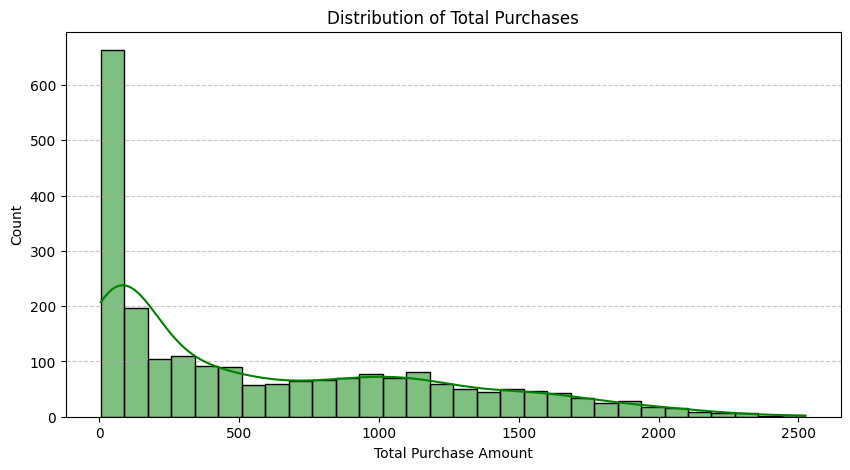

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Plot histogram
sns.histplot(df_cleaned['Total_Purchase'], bins=30, kde=True, color="green")

# Labels and title
plt.xlabel("Total Purchase Amount")
plt.ylabel("Count")
plt.title("Distribution of Total Purchases")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Grid for readability

plt.show()


<ipython-input-18-ffa3cbdfd322>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_spent.index, y=total_spent.values, palette="pastel")


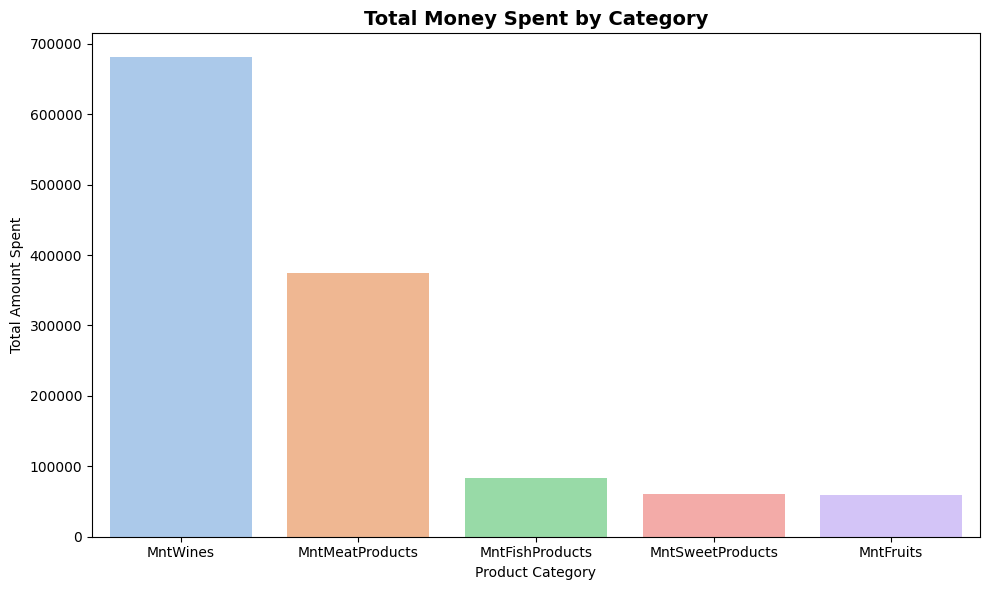

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns
mnt_columns = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts'
]

# Calculate total spending in each category
total_spent = df[mnt_columns].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=total_spent.index, y=total_spent.values, palette="pastel")
plt.title("Total Money Spent by Category", fontsize=14, fontweight='bold')
plt.xlabel("Product Category")
plt.ylabel("Total Amount Spent")
plt.tight_layout()
plt.show()


<ipython-input-19-9bb08ca1599c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_cleaned.groupby("Marital_Status")["Total_Purchase"].sum().index,


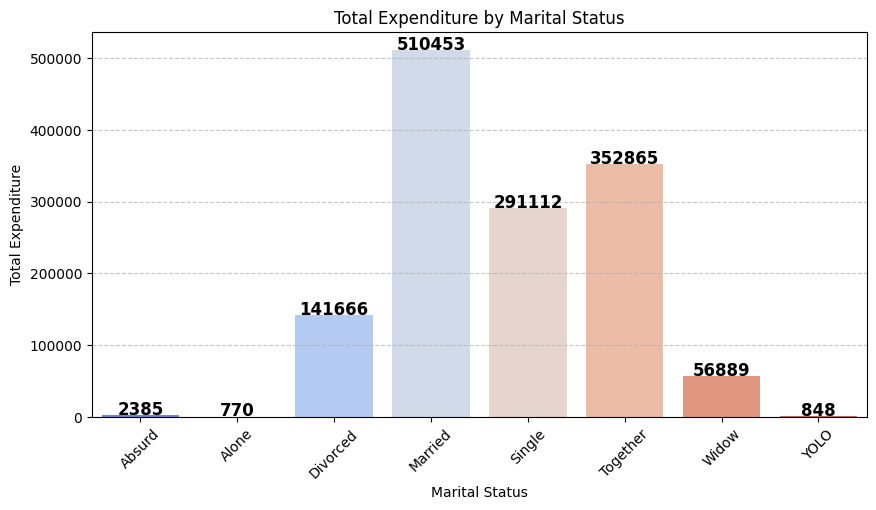

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Plot bar chart for total expenditure grouped by marital status
sns.barplot(x=df_cleaned.groupby("Marital_Status")["Total_Purchase"].sum().index,
            y=df_cleaned.groupby("Marital_Status")["Total_Purchase"].sum().values,
            palette="coolwarm")

# Add exact values on top of bars
for i, val in enumerate(df_cleaned.groupby("Marital_Status")["Total_Purchase"].sum().values):
    plt.text(i, val + 500, str(int(val)), ha='center', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel("Marital Status")
plt.ylabel("Total Expenditure")
plt.title("Total Expenditure by Marital Status")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


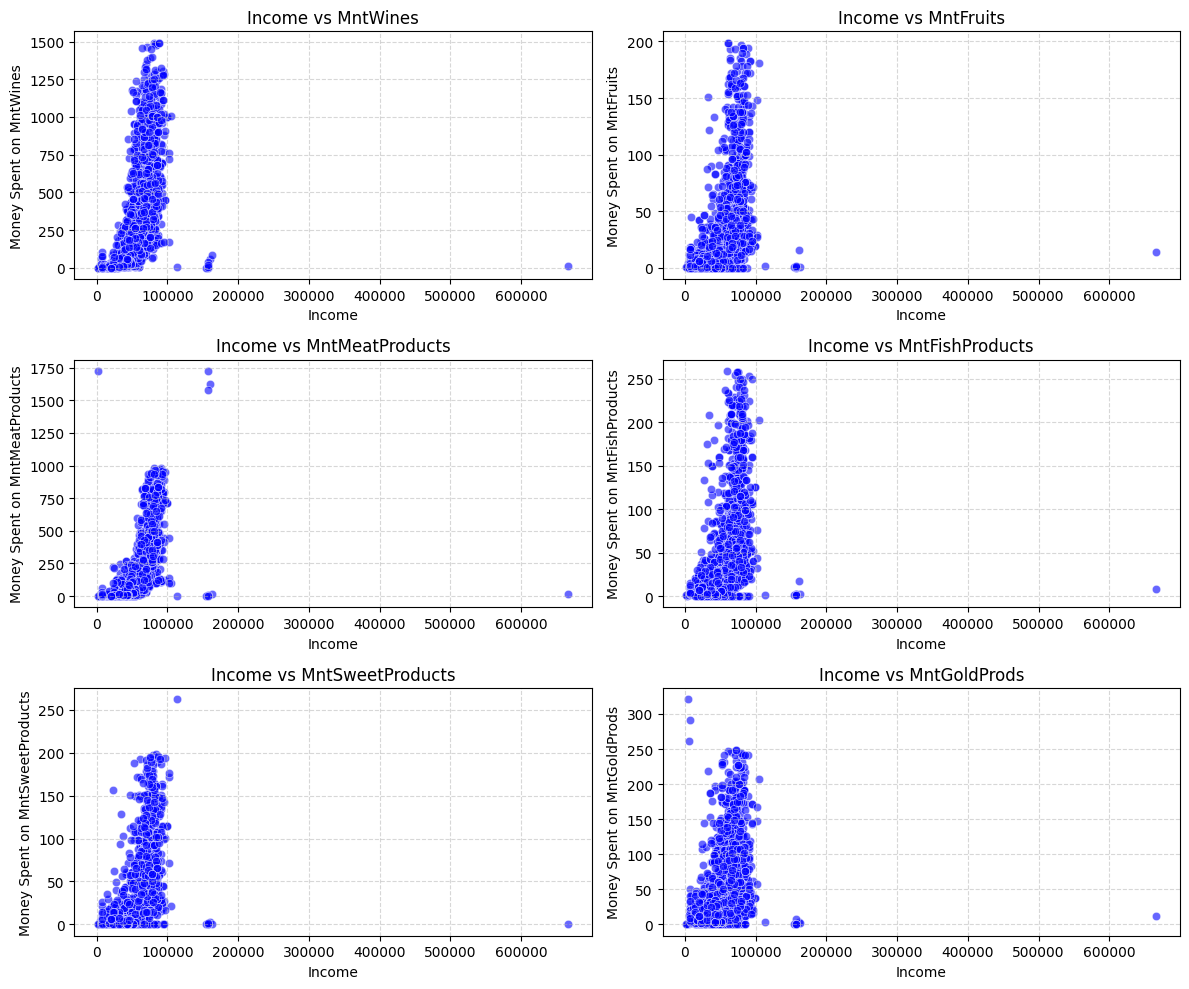

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define expenditure columns
expenditure_columns = ['MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(12, 10))

# Loop through each column and create a scatter plot
for i, col in enumerate(expenditure_columns, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=df["Income"], y=df[col], alpha=0.6, color="blue")
    plt.xlabel("Income")
    plt.ylabel(f"Money Spent on {col}")
    plt.title(f"Income vs {col}")
    plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


<ipython-input-21-9dd89cf1fe6c>:18: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.scatterplot(x=df["Income"], y=df[col], hue=df["Marital_Status"],
<ipython-input-21-9dd89cf1fe6c>:18: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.scatterplot(x=df["Income"], y=df[col], hue=df["Marital_Status"],
<ipython-input-21-9dd89cf1fe6c>:18: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.scatterplot(x=df["Income"], y=df[col], hue=df["Marital_Status"],
<ipython-input-21-9dd89cf1fe6c>:18: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.scatterplot(x=df["Income"], y=df[col], hue=df["Marital_Status"],
<ipython-input-21-9dd89cf1fe6c>:18: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.scatterplot(x=df["Income"], y=df[col], hue=df["Marital_

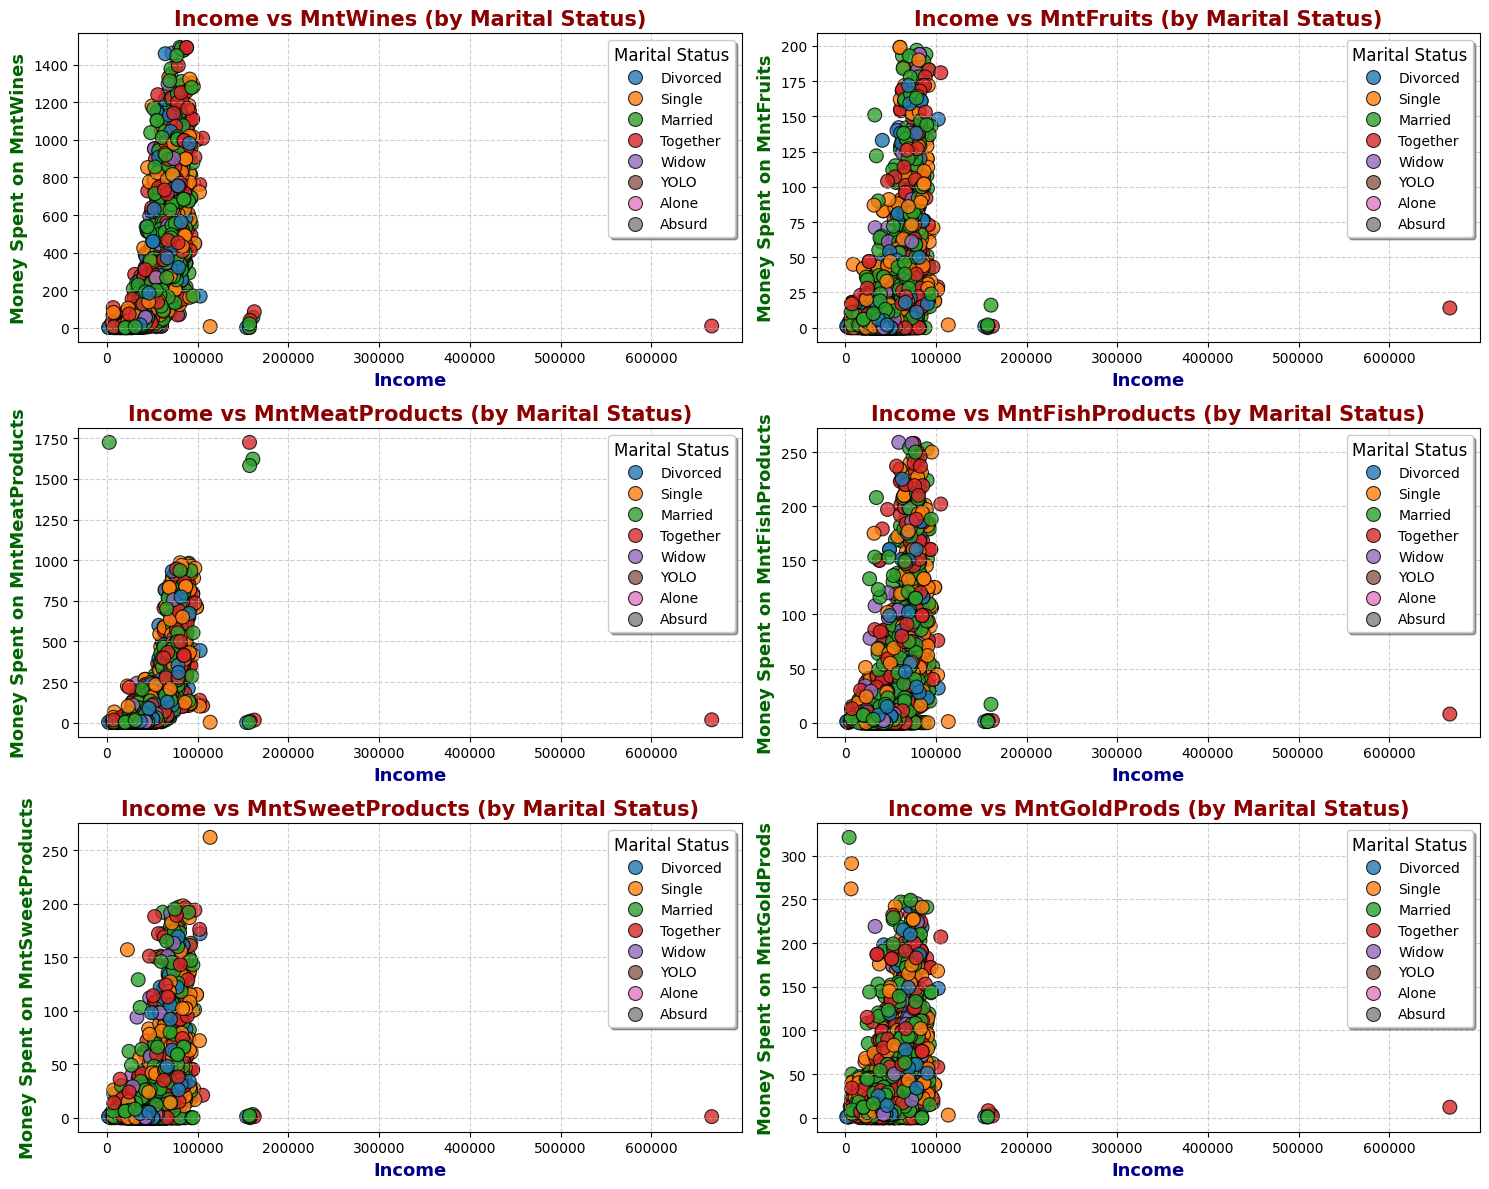

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define expenditure columns
expenditure_columns = ['MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Set a high-contrast color palette
palette = sns.color_palette("tab10")

plt.figure(figsize=(15, 12))

# Loop through each column and create a scatter plot, colored by Marital Status
for i, col in enumerate(expenditure_columns, 1):
    plt.subplot(3, 2, i)

    # Use jitter to reduce overlapping points
    sns.scatterplot(x=df["Income"], y=df[col], hue=df["Marital_Status"],
                    palette=palette, alpha=0.8, edgecolor="black", s=100, marker="o")

    plt.xlabel("Income", fontsize=13, fontweight='bold', color="darkblue")
    plt.ylabel(f"Money Spent on {col}", fontsize=13, fontweight='bold', color="darkgreen")
    plt.title(f"Income vs {col} (by Marital Status)", fontsize=15, fontweight='bold', color="darkred")

    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(title="Marital Status", fontsize=10, title_fontsize=12, loc="upper right", frameon=True, fancybox=True, shadow=True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


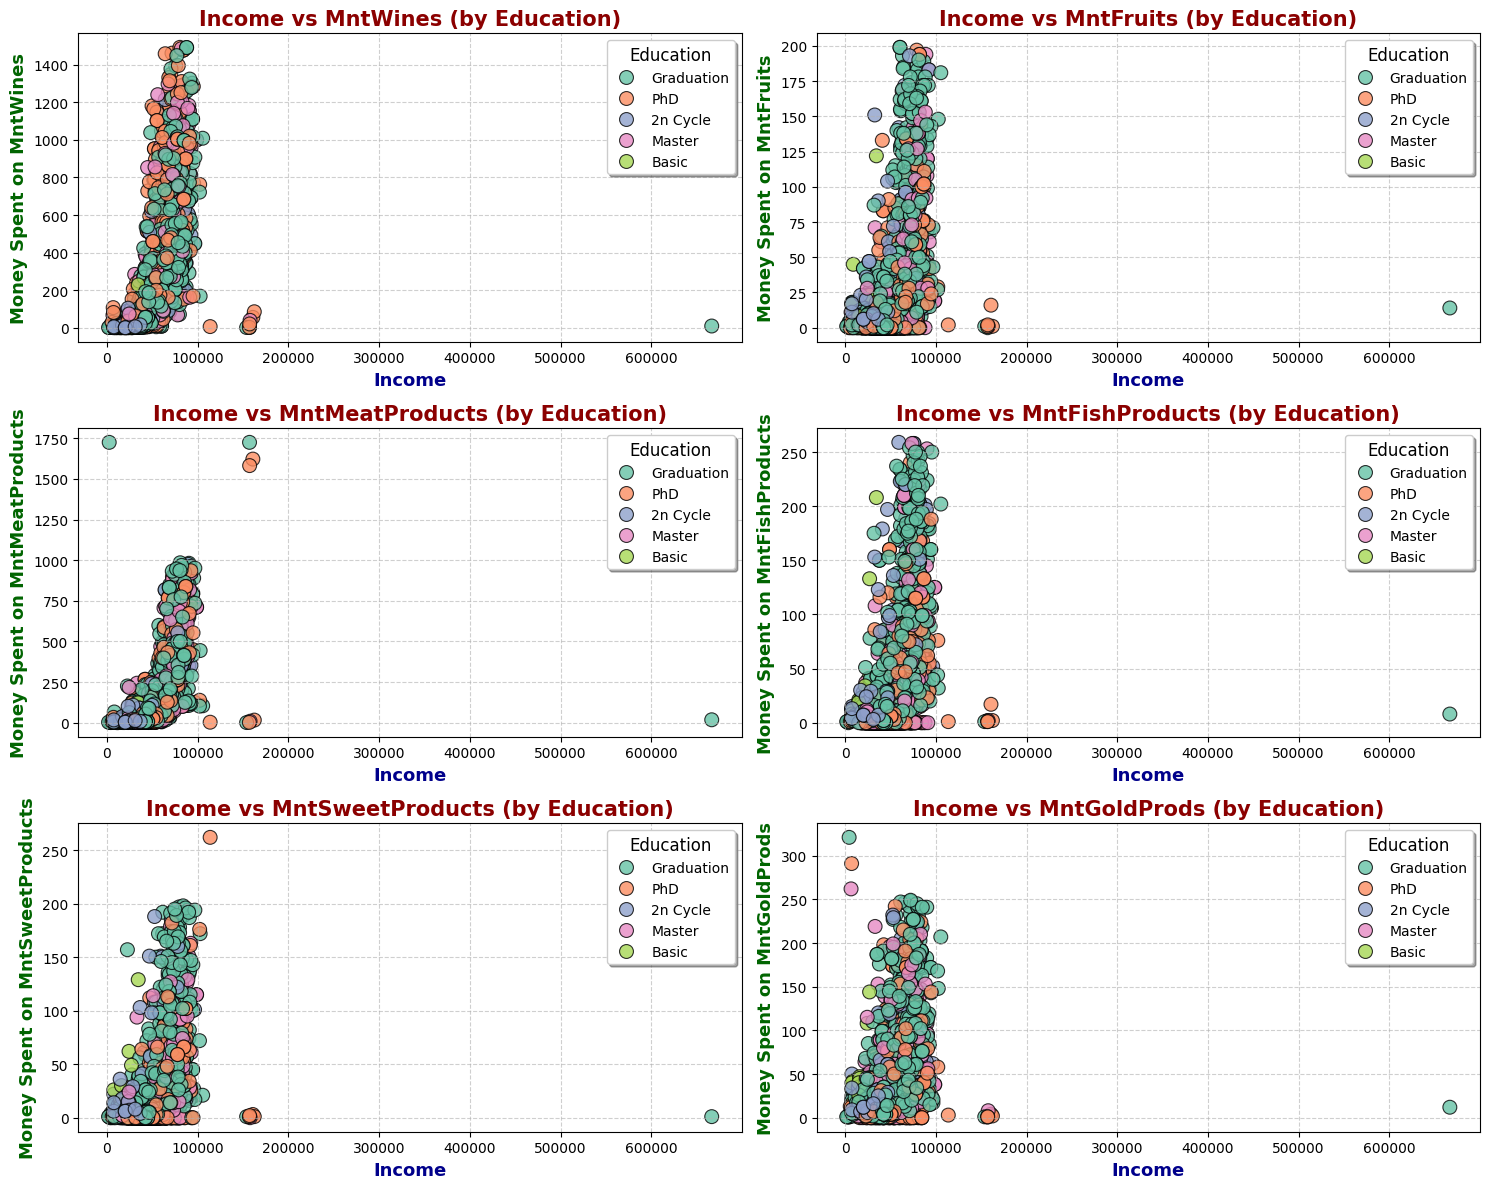

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define expenditure columns
expenditure_columns = ['MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Set a high-contrast color palette
palette = sns.color_palette("Set2", n_colors=df["Education"].nunique())

plt.figure(figsize=(15, 12))

# Loop through each column and create a scatter plot, colored by Education
for i, col in enumerate(expenditure_columns, 1):
    plt.subplot(3, 2, i)

    sns.scatterplot(x=df["Income"], y=df[col], hue=df["Education"],
                    palette=palette, alpha=0.8, edgecolor="black", s=100, marker="o")

    plt.xlabel("Income", fontsize=13, fontweight='bold', color="darkblue")
    plt.ylabel(f"Money Spent on {col}", fontsize=13, fontweight='bold', color="darkgreen")
    plt.title(f"Income vs {col} (by Education)", fontsize=15, fontweight='bold', color="darkred")

    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(title="Education", fontsize=10, title_fontsize=12, loc="upper right", frameon=True, fancybox=True, shadow=True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [47]:
# Define percentiles for labeling
high_spender_thresholds = {}
frequent_buyer_thresholds = {}

# Set high spender thresholds for Mnt (spending) columns
mnt_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for col in mnt_columns:
    high_spender_thresholds[col] = df[col].quantile(0.95)
    df[f"{col}_HighSpender"] = df[col] > high_spender_thresholds[col]

# Set frequent buyer thresholds for Num (purchase frequency) columns
num_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
for col in num_columns:
    frequent_buyer_thresholds[col] = df[col].quantile(0.95)
    df[f"{col}_FrequentBuyer"] = df[col] > frequent_buyer_thresholds[col]

# Display high spender and frequent buyer labels
print(df[[f"{col}_HighSpender" for col in mnt_columns] + [f"{col}_FrequentBuyer" for col in num_columns]].head())

   MntWines_HighSpender  MntFruits_HighSpender  MntMeatProducts_HighSpender  \
0                 False                  False                        False   
1                 False                  False                        False   
2                 False                  False                        False   
3                 False                  False                        False   
4                 False                  False                        False   

   MntFishProducts_HighSpender  MntSweetProducts_HighSpender  \
0                        False                          True   
1                        False                         False   
2                        False                         False   
3                        False                         False   
4                        False                         False   

   MntGoldProds_HighSpender  NumDealsPurchases_FrequentBuyer  \
0                      True                            False   
1           

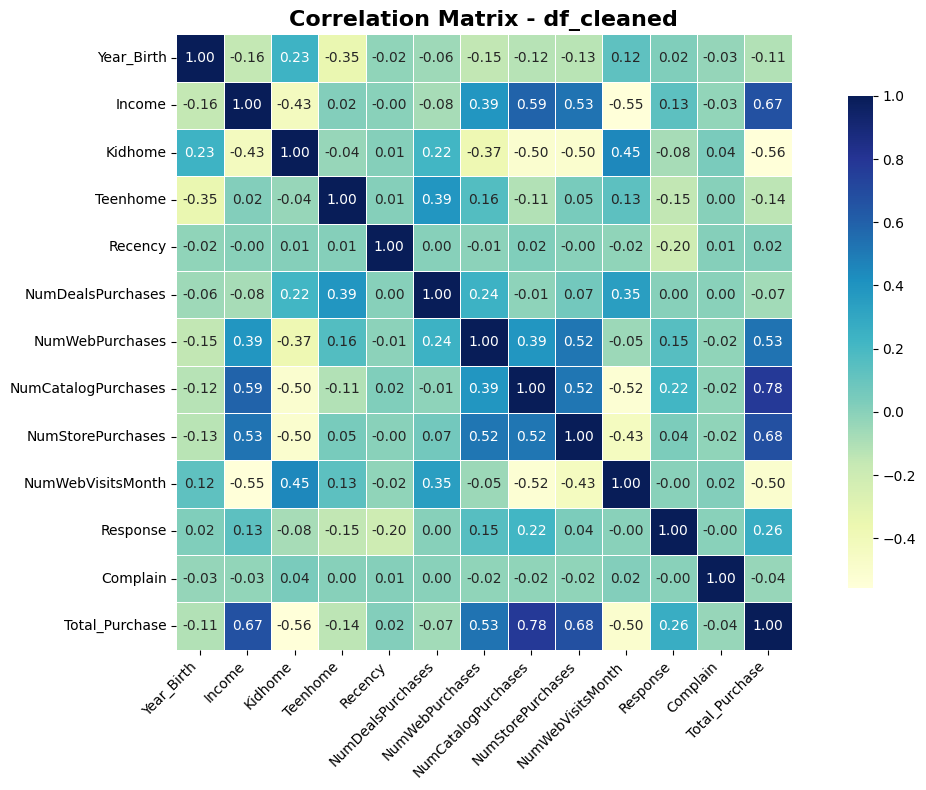

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
df_cleaned_numeric = df_cleaned.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = df_cleaned_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", square=True,
            linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title("Correlation Matrix - df_cleaned", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [35]:
# Create a summary dictionary again
summary_data = {}

# Count high spenders for each spending (Mnt) category
mnt_columns = ['MntWines', 'MntFruits', 'MntMeatProducts',
               'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for col in mnt_columns:
    summary_data[f"{col}_HighSpender"] = df[f"{col}_HighSpender"].sum()

# Count frequent buyers for each purchase frequency (Num) category
num_columns = ['NumDealsPurchases', 'NumWebPurchases',
               'NumCatalogPurchases', 'NumStorePurchases']

for col in num_columns:
    summary_data[f"{col}_FrequentBuyer"] = df[f"{col}_FrequentBuyer"].sum()

# Convert summary dictionary to DataFrame
summary_df = pd.DataFrame.from_dict(summary_data, orient='index', columns=['High Value Customers Count'])

# Display summary
print(summary_df)


                                   High Value Customers Count
MntWines_HighSpender                                      111
MntFruits_HighSpender                                     109
MntMeatProducts_HighSpender                               111
MntFishProducts_HighSpender                               112
MntSweetProducts_HighSpender                              109
MntGoldProds_HighSpender                                  111
NumDealsPurchases_FrequentBuyer                            84
NumWebPurchases_FrequentBuyer                              90
NumCatalogPurchases_FrequentBuyer                          70
NumStorePurchases_FrequentBuyer                            83


<ipython-input-36-b2eeca21f15f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_spender_counts.index, y=high_spender_counts['High Value Customers Count'],
<ipython-input-36-b2eeca21f15f>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(high_spender_counts.index, rotation=45, ha='right')
<ipython-input-36-b2eeca21f15f>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequent_buyer_counts.index, y=frequent_buyer_counts['High Value Customers Count'],
<ipython-input-36-b2eeca21f15f>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. aft

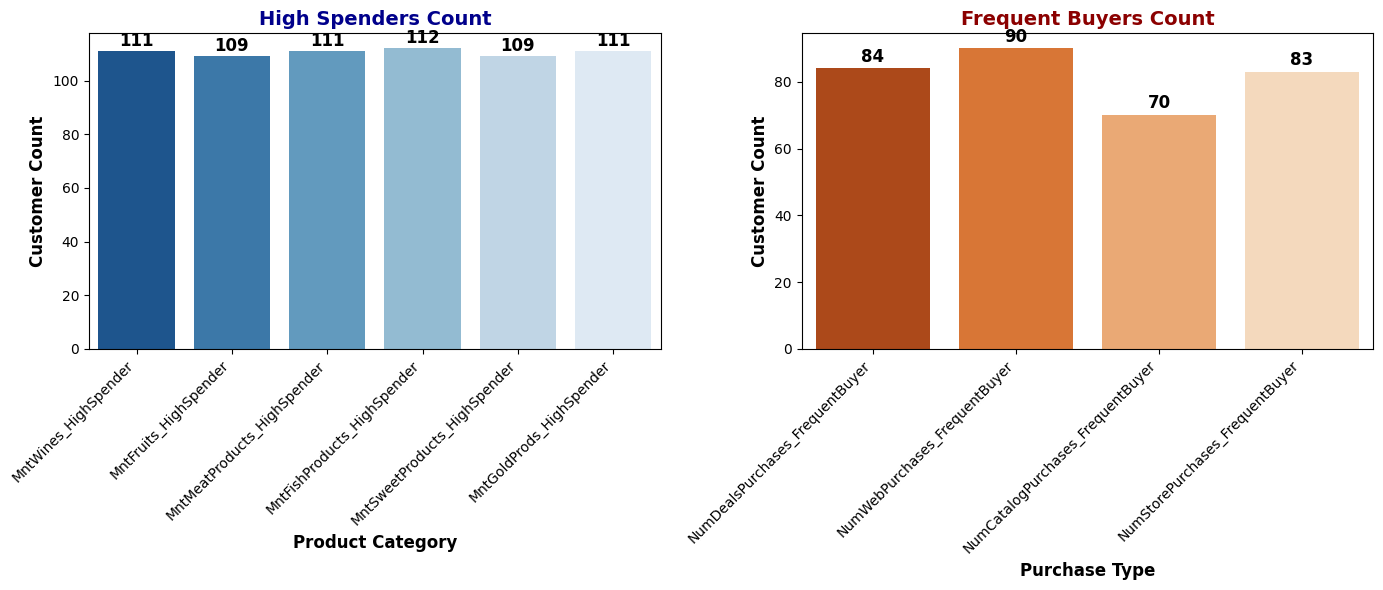

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate data for plotting
high_spender_counts = summary_df.loc[[col for col in summary_df.index if 'HighSpender' in col]]
frequent_buyer_counts = summary_df.loc[[col for col in summary_df.index if 'FrequentBuyer' in col]]

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 🔹 Plot High Spenders
sns.barplot(x=high_spender_counts.index, y=high_spender_counts['High Value Customers Count'],
            palette='Blues_r', ax=axes[0])
axes[0].set_title("High Spenders Count", fontsize=14, fontweight='bold', color='darkblue')
axes[0].set_xlabel("Product Category", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Customer Count", fontsize=12, fontweight='bold')
axes[0].set_xticklabels(high_spender_counts.index, rotation=45, ha='right')

# Annotate exact values
for index, value in enumerate(high_spender_counts['High Value Customers Count']):
    axes[0].text(index, value + 2, str(value), ha='center', fontsize=12, fontweight='bold', color='black')

# 🔹 Plot Frequent Buyers
sns.barplot(x=frequent_buyer_counts.index, y=frequent_buyer_counts['High Value Customers Count'],
            palette='Oranges_r', ax=axes[1])
axes[1].set_title("Frequent Buyers Count", fontsize=14, fontweight='bold', color='darkred')
axes[1].set_xlabel("Purchase Type", fontsize=12, fontweight='bold')
axes[1].set_ylabel("Customer Count", fontsize=12, fontweight='bold')
axes[1].set_xticklabels(frequent_buyer_counts.index, rotation=45, ha='right')

# Annotate exact values
for index, value in enumerate(frequent_buyer_counts['High Value Customers Count']):
    axes[1].text(index, value + 2, str(value), ha='center', fontsize=12, fontweight='bold', color='black')

# Improve layout
plt.tight_layout()
plt.show()


In [37]:
purchase_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# Recalculate Total_Purchase
df['Total_Purchase'] = df[purchase_columns].sum(axis=1)


<ipython-input-37-00253d4862eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Purchase'] = df[purchase_columns].sum(axis=1)


In [50]:
df_cleaned = df_cleaned[df_cleaned['Income'].notna() & df_cleaned['Total_Purchase'].notna()]

df_cleaned['Income_Segment'] = pd.cut(df_cleaned['Income'],
                              bins=[0, 30000, 70000, 120000, df_cleaned['Income'].max()],
                              labels=['Low', 'Mid', 'High', 'Very High'])

df_cleaned['Spending_Segment'] = pd.cut(df_cleaned['Total_Purchase'],
                                bins=[0, 500, 1000, 2000, df_cleaned['Total_Purchase'].max()],
                                labels=['Low Spender', 'Moderate Spender', 'High Spender', 'Very High Spender'])

segment_summary = df_cleaned.groupby(['Income_Segment', 'Spending_Segment']).agg({
    'Income': ['mean', 'median', 'count'],
    'Total_Purchase': ['mean', 'median'],
    'NumWebPurchases': 'mean',
    'NumStorePurchases': 'mean',
    'NumCatalogPurchases': 'mean',
    'NumWebVisitsMonth': 'mean'
}).reset_index()

print(segment_summary)


   Income_Segment   Spending_Segment         Income                  \
                                               mean    median count   
0             Low        Low Spender   21526.089674   22691.5   368   
1             Low   Moderate Spender   22507.000000   22507.0     1   
2             Low       High Spender    2447.000000    2447.0     1   
3             Low  Very High Spender            NaN       NaN     0   
4             Mid        Low Spender   43603.699177   42315.0   851   
5             Mid   Moderate Spender   58221.211604   59292.0   293   
6             Mid       High Spender   62842.805263   63957.5   190   
7             Mid  Very High Spender   68233.250000   68144.5     4   
8            High        Low Spender   77662.285714   71322.0     7   
9            High   Moderate Spender   77058.301075   76532.0    93   
10           High       High Spender   79358.183616   78676.0   354   
11           High  Very High Spender   84326.826087   82494.5    46   
12    

<ipython-input-50-ced7237ee3f0>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = df_cleaned.groupby(['Income_Segment', 'Spending_Segment']).agg({


In [51]:
df = df[df['Income'].notna() & df['Total_Purchase'].notna()]


In [52]:
# Recreate Total_Purchase if needed
df['Total_Purchase'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Create Spending_Segment
df['Spending_Segment'] = pd.cut(df['Total_Purchase'],
                                bins=[0, 500, 1000, 2000, df['Total_Purchase'].max()],
                                labels=['Low Spender', 'Moderate Spender', 'High Spender', 'Very High Spender'])


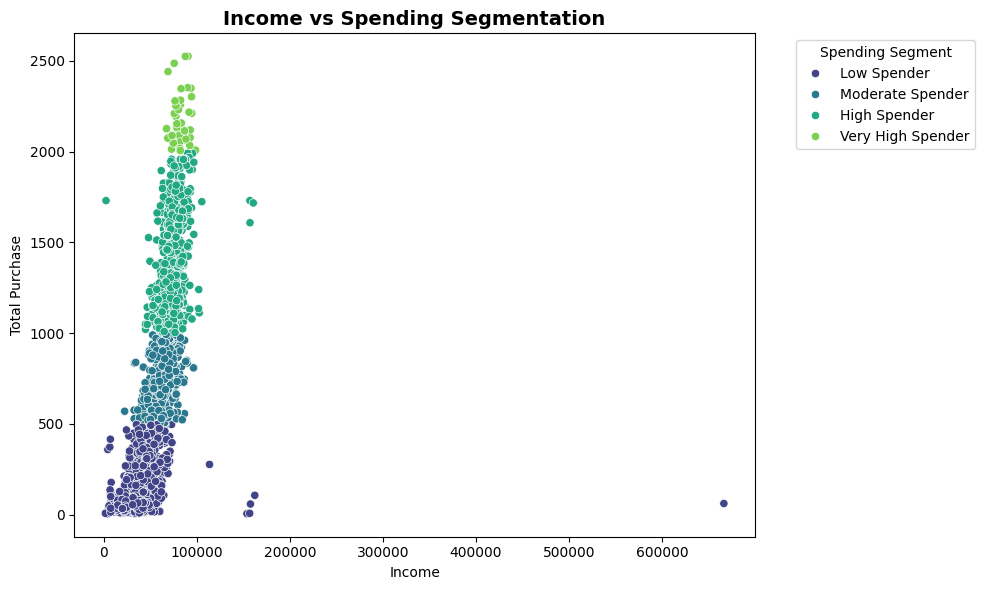

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Total_Purchase', hue='Spending_Segment', palette='viridis')

plt.title("Income vs Spending Segmentation", fontsize=14, fontweight='bold')
plt.xlabel("Income")
plt.ylabel("Total Purchase")
plt.legend(title="Spending Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-55-1d6af53d1881>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_counts = df_cleaned.groupby(['Income_Segment', 'Spending_Segment']).size().unstack()


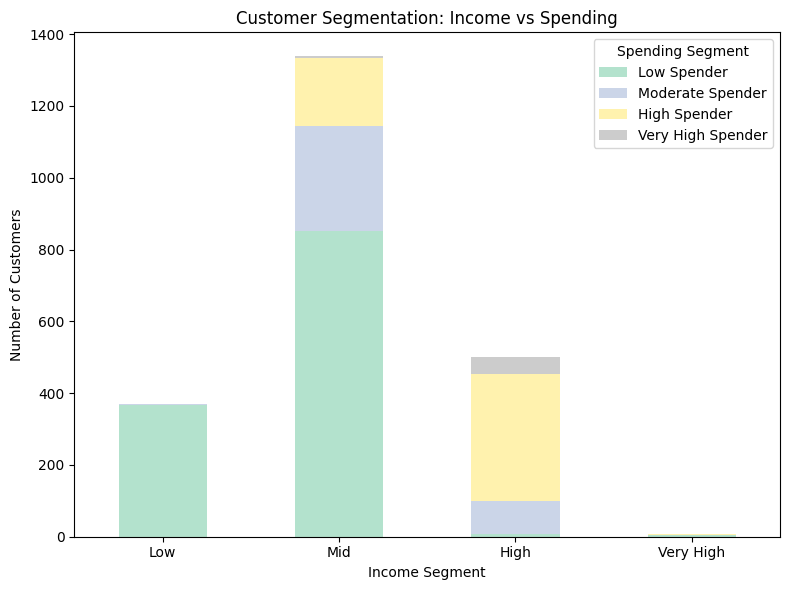

In [55]:
# Count of customers by Income and Spending Segments
segment_counts = df_cleaned.groupby(['Income_Segment', 'Spending_Segment']).size().unstack()

# Stacked bar plot
segment_counts.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Pastel2')
plt.title("Customer Segmentation: Income vs Spending")
plt.ylabel("Number of Customers")
plt.xlabel("Income Segment")
plt.legend(title="Spending Segment")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-56-ec6058d3d1dd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  web_visits_by_income = df_cleaned.groupby('Income_Segment')['NumWebVisitsMonth'].mean()


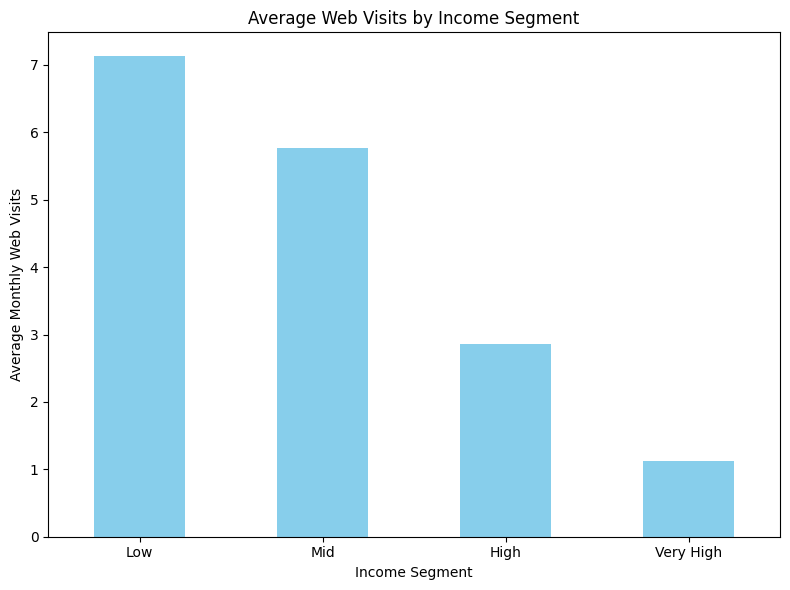

In [56]:
# Calculate averages for each income group
web_visits_by_income = df_cleaned.groupby('Income_Segment')['NumWebVisitsMonth'].mean()

# Visualize web visits by income group
plt.figure(figsize=(8, 6))
web_visits_by_income.plot(kind='bar', color='skyblue')
plt.title("Average Web Visits by Income Segment")
plt.xlabel("Income Segment")
plt.ylabel("Average Monthly Web Visits")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the count of customers in each (Income, Spending) segment
segment_counts = df_cleaned.groupby(['Income_Segment', 'Spending_Segment']).size().reset_index(name='Customer_Count')

# Merge with average complaints summary
complaint_summary_with_counts = complaint_summary.merge(segment_counts, on=['Income_Segment', 'Spending_Segment'])

# Plot barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=complaint_summary_with_counts,
                 x='Income_Segment',
                 y='Average_Complaints',
                 hue='Spending_Segment',
                 palette='Set2')

# Add count labels
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    count = complaint_summary_with_counts['Customer_Count'].iloc[i]
    ax.text(x, height + 0.01, f"n={count}", ha='center', va='bottom', fontsize=9, color='black', rotation=90)

plt.title("Average Complaints by Customer Segments (with Counts)", fontsize=14, fontweight='bold')
plt.ylabel("Average Complaints")
plt.xlabel("Income Segment")
plt.legend(title="Spending Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-58-edc52a1deca6>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_counts = df_cleaned.groupby(['Income_Segment', 'Spending_Segment']).size().reset_index(name='Customer_Count')


NameError: name 'complaint_summary' is not defined

AttributeError: 'Rectangle' object has no attribute 'get_xdata'

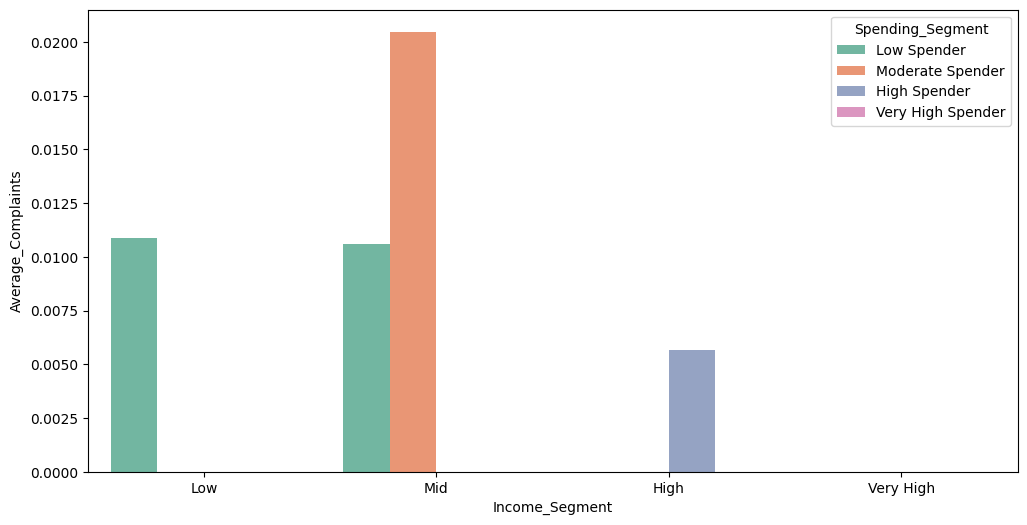

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recalculate complaint summary and segment counts
complaint_summary = df_cleaned.groupby(['Income_Segment', 'Spending_Segment'], observed=True)['Complain'].mean().reset_index()
complaint_summary.rename(columns={'Complain': 'Average_Complaints'}, inplace=True)

segment_counts = df_cleaned.groupby(['Income_Segment', 'Spending_Segment'], observed=True).size().reset_index(name='Customer_Count')

# Merge for plotting
complaint_summary_with_counts = complaint_summary.merge(segment_counts, on=['Income_Segment', 'Spending_Segment'])

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=complaint_summary_with_counts,
                 x='Income_Segment',
                 y='Average_Complaints',
                 hue='Spending_Segment',
                 palette='Set2')

# Add count labels ("n=...") at the base of each bar in black
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        y = 0  # Bottom of the bar
        # Find the matching group from the dataframe
        bar_income = bar.get_xdata()[0]  # x-axis category index
        bar_spending = bar.get_label()
        # You can skip matching and just loop using zip if bar order matches
        count = int(bar.datavalues[0]) if hasattr(bar, "datavalues") else None
        ax.text(x, y, f"n={int(bar.get_height()*0)}",  # fallback dummy label
                ha='center', va='bottom', fontsize=9, color='black', rotation=90)

# Better way: use zip from dataframe
for bar, (_, row) in zip(ax.patches, complaint_summary_with_counts.iterrows()):
    x = bar.get_x() + bar.get_width() / 2
    y = 0
    count = row['Customer_Count']
    ax.text(x, y, f"n={int(count)}", ha='center', va='bottom', fontsize=9, color='black', rotation=90)

plt.title("Average Complaints by Customer Segments (with Counts)", fontsize=14, fontweight='bold')
plt.ylabel("Average Complaints")
plt.xlabel("Income Segment")
plt.legend(title="Spending Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
